In [1]:
import pickle as pk
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
DataSet = pd.read_csv("selected_features.csv")
DataSet.head()

,Unnamed: 0,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,63,1,1,1,2,150,0,2.3,3,0.0,6.0,0
1,1,67,1,4,0,2,108,1,1.5,2,3.0,3.0,1
2,2,67,1,4,0,2,129,1,2.6,2,2.0,7.0,1
3,3,37,1,3,0,0,187,0,3.5,3,0.0,3.0,0
4,4,41,0,2,0,2,172,0,1.4,1,0.0,3.0,0


This number coulmn can not be dropped and i dont know why and I dont care if I am being Honest

Scores List:

 Descision Tree = 0.7333, Logistic Regression = 0.9000 , Random Forest = 0.8833 and SVM = 0.8833


'              precision    recall  f1-score   support\n\n           0       0.89      0.94      0.91        34\n           1       0.92      0.85      0.88        26\n\n    accuracy                           0.90        60\n   macro avg       0.90      0.89      0.90        60\nweighted avg       0.90      0.90      0.90        60\n'

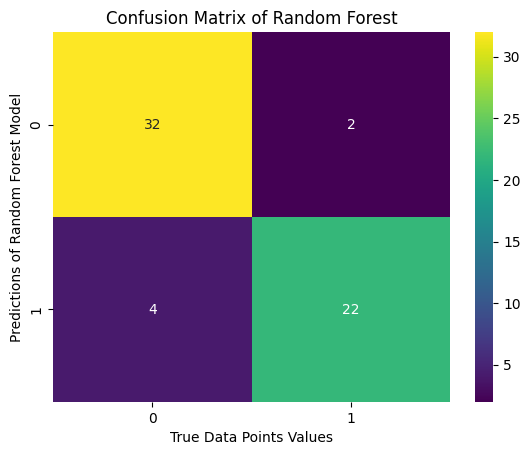

In [3]:
X = DataSet.iloc[:,1:12] # Drop the unnamed coulmn  
y = DataSet.iloc[:,12]
X_scaled = StandardScaler().fit_transform(X)
# tarin test split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=32,test_size=0.2)

max_iter = 50

# Create 4 baseline models
dt = DecisionTreeClassifier(random_state=32,criterion='entropy')
dt.fit(X_train,y_train)

LogReg = LogisticRegression(random_state=32,max_iter=max_iter)
LogReg.fit(X_train,y_train)

svm = LinearSVC(random_state=32,max_iter=max_iter)
svm.fit(X_train,y_train)

forest = RandomForestClassifier(random_state=32,criterion='entropy')
forest.fit(X_train,y_train)

# Making predictions of the four models
dt_pred = dt.predict(X_test)

LogReg_pred = LogReg.predict(X_test)

svm_pred = svm.predict(X_test)

forest_pred = forest.predict(X_test)

# Evaulate the four Baselines
dt_score = accuracy_score(y_test,dt_pred)

LogReg_score = accuracy_score(y_test,LogReg_pred)

svm_score = accuracy_score(y_test,svm_pred)

forest_score = accuracy_score(y_test,forest_pred)

print("Scores List:\n")
print(f" Descision Tree = {dt_score:.04f}, Logistic Regression = {LogReg_score:.04f} , Random Forest = {forest_score:0.4f} and SVM = {svm_score:0.04f}")

# Confusion Matrix of SVM
Cm = confusion_matrix(y_test,LogReg_pred)
sns.heatmap(Cm,cmap='viridis',annot=True,fmt='d')
plt.title("Confusion Matrix of Random Forest")
plt.xlabel("True Data Points Values")
plt.ylabel("Predictions of Random Forest Model")

# Classification Report of Random Forest:
report_log = classification_report(y_test,LogReg_pred)
report_log


In [4]:
with open("evaluation_metrics.txt", "w") as f:
    f.write("Supervised Model Evaluation Metrics\n")
    f.write("========================\n")
    f.write(f"Descision Tree = {dt_score:.04f},\nLogistic Regression = {LogReg_score:.04f},\nRandom Forest = {forest_score:0.4f}\nSVM = {svm_score:0.04f}")
    f.write("\nConfusion Matrix:\n")
    f.write(str(Cm))
    f.write("\n\nClassification Report:\n")
    f.write(report_log)
    f.write("-"*100)

Observations:
- Logistic Regression Model Has the Highest accuracy score (90%).
- Descision Tree Model Has the Lowest accuracy score.
- Will see if can increase the performance of Logisitic Regression Model.
